In [1]:
from clusc import *

from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
circos_chrom = dict(
    file='/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt',
    cytobands_file='/home/archer/Desktop/ClusC/examples/chromosome.band.hg19.txt',
    radius=0.85,
    width=0.4,
#    color=['red','orange','green','blue'],
    type='chrom')

circos_clusters_bed  = dict(
    file='/home/archer/Desktop/ClusC/examples/clusters.bed',
    radius=0.65,
    width=0.4,
    color=['red','orange','green','blue'],
    type='highlight')

circos_clusters_signal  = dict(
    file='/home/archer/Desktop/ClusC/examples/clusters.bed',
    radius=0.35,
    width=0.4,
#    color=['red','orange','green','blue'],
    type='bar')

circos_configs = {}
circos_configs[0] = circos_chrom
circos_configs[1] = circos_clusters_bed
circos_configs[2] = circos_clusters_signal

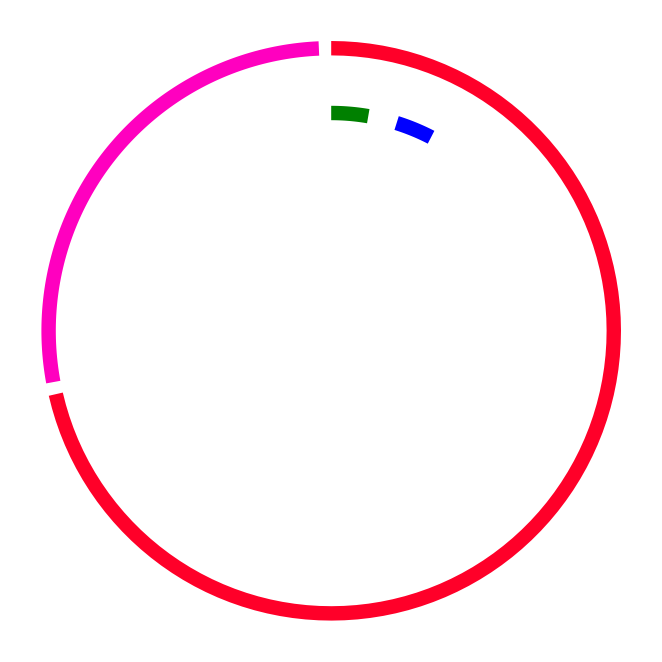

In [3]:
plotting_circos(circos_configs, '/home/archer/Desktop/ClusC/examples/results/plotting_circos.png')

In [7]:
tmp_pd = pd.read_csv(circos_configs[1].get('file'), sep="\t", names=['chrom','start','end','name','score','strand'])

In [10]:
if circos_configs[i].get('color') != None:
    color = circos_configs[0].get('color')
    if isinstance(color, str):
        if is_colormap(color):
            colormap = color
            colorlist = colormap_to_rbg(colormap, vmin, vmax)
            color = None
        else:
            color = [color]
else:
    colormap = default_colormap
    colorlist = colormap_to_rbg(colormap, vmin, vmax)
    color = None

NameError: name 'i' is not defined

In [26]:
chrom_regions = pd.read_csv(circos_configs[0].get('file'), sep="\t", names=['chrom','start','end'])
chrom_regions['length'] = chrom_regions['end']-chrom_regions['start']
total_len = chrom_regions['length'].sum()
gap = circos_configs[0].get('gap', np.pi/72)
len_per_theta = total_len/(np.pi*2-gap*chrom_regions.shape[0])

cumlen = [0] + list(chrom_regions['length'].cumsum())[:-1]
chrom_regions['theta_start'] = [np.pi/2-l/len_per_theta-gap*i for i,l in enumerate(cumlen)]
chrom_regions['theta_end'] = chrom_regions['theta_start']-chrom_regions['length']/len_per_theta

In [19]:
c

['r', 'e', 'd']

In [60]:
chrom_regions = get_theta(chrom_regions, gap, len_per_theta)
chrom_regions

,chrom,start,end,length,theta_start,theta_end
0,chr11,107356000,109840000,2484000,1.570796,1.473236
1,chrX,0,155270560,155270560,1.429602,-4.668756


In [22]:
6%1

0

In [13]:
cumlen = [0] + list(chrom_regions['length'].cumsum())[:-1]
cumlen

[0, 2484000]

In [10]:
chrom_regions[2]-chrom_regions[1]

0      2484000
1    155270560
dtype: int64

In [28]:
c = 'red'

In [31]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
cNorm  = colors.Normalize(vmin=0, vmax=5)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='gist_rainbow')

In [35]:
scalarMap.to_rgba(0)

(1.0, 0.0, 0.16, 1.0)

In [15]:
fig.show()

/home/archer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
